# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
#Lets load the data
df = pd.read_csv('cleaned_data.csv')

In [3]:
df = df.drop(['Unnamed: 0'],axis=1)

###  Lets start with count plot

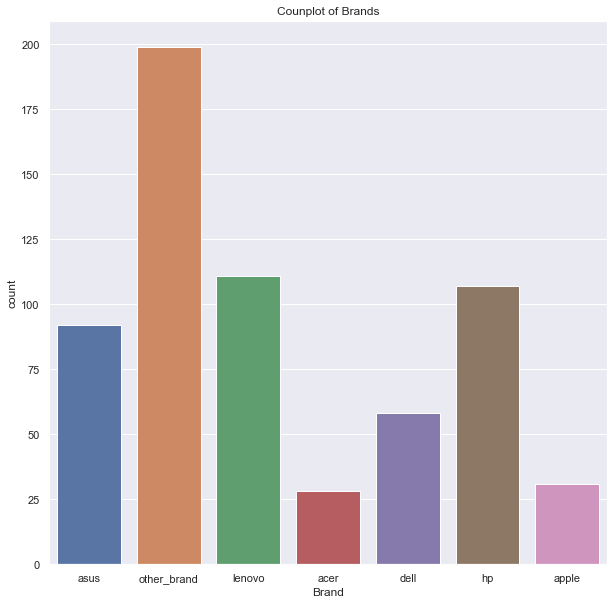

In [4]:
#Lets plot the count of laptop for each brand
plt.figure(figsize=(10,10))
ax = sns.countplot(x = 'Brand', data = df).set(title = 'Counplot of Brands')

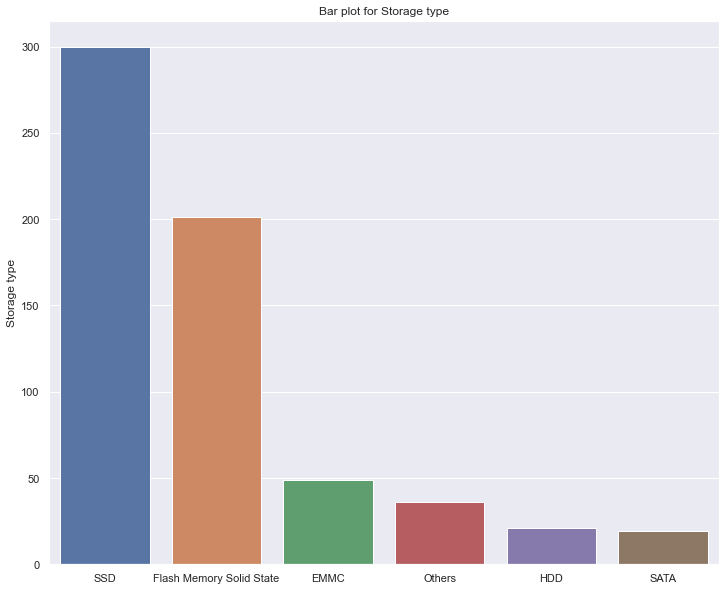

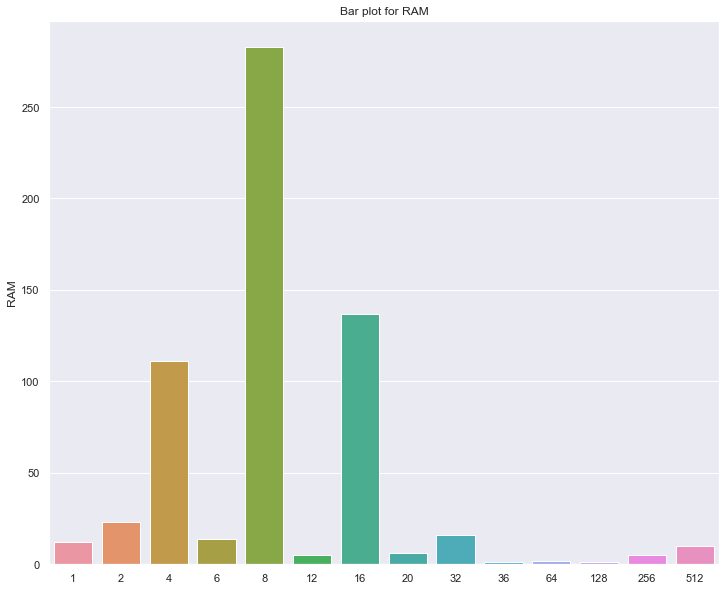

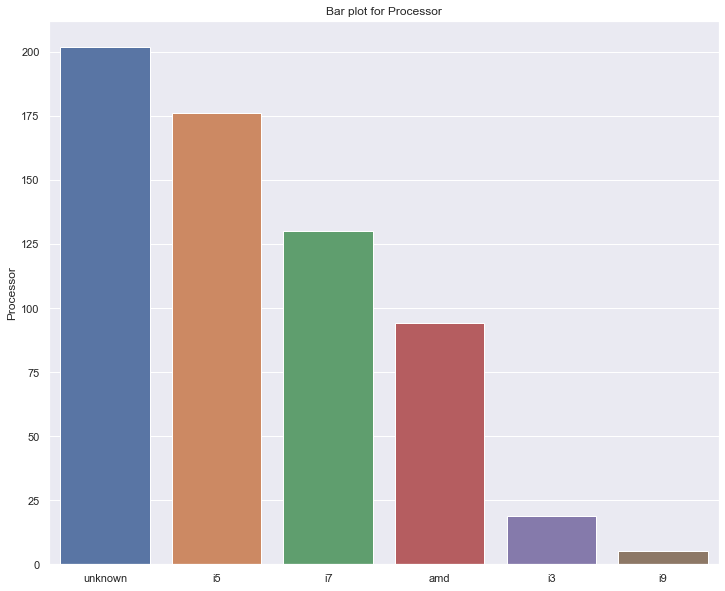

In [5]:
for i in ['Storage type' , 'RAM'  , 'Processor']:
    plt.figure(figsize=(12,10))
    value = df[i].value_counts()
    plt.title("Bar plot for {}".format(i))
    chart = sns.barplot(x = value.index , y= value)
    plt.show()

### RAM distribution across each Brands

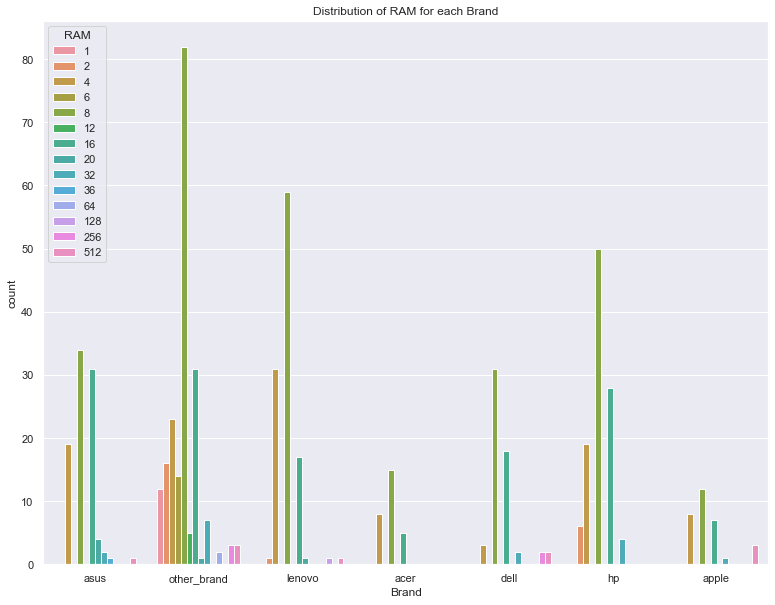

In [6]:
plt.figure(figsize=(13,10))
ax = sns.countplot(x = 'Brand', hue = 'RAM', data = df ).set(title='Distribution of RAM for each Brand')

### Brands wiht/without Graphics card

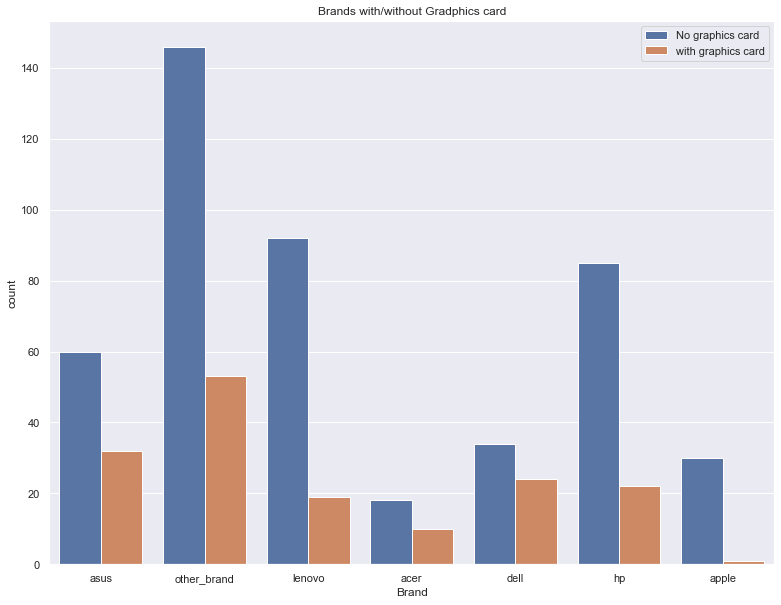

In [7]:
plt.figure(figsize=(13,10))
ax = sns.countplot(x = 'Brand', hue = 'graphics', data = df ).set(title='Brands with/without Gradphics card')
plt.legend(labels=['No graphics card', 'with graphics card'])
plt.show(ax)

### Countplot for Storage type across each brands

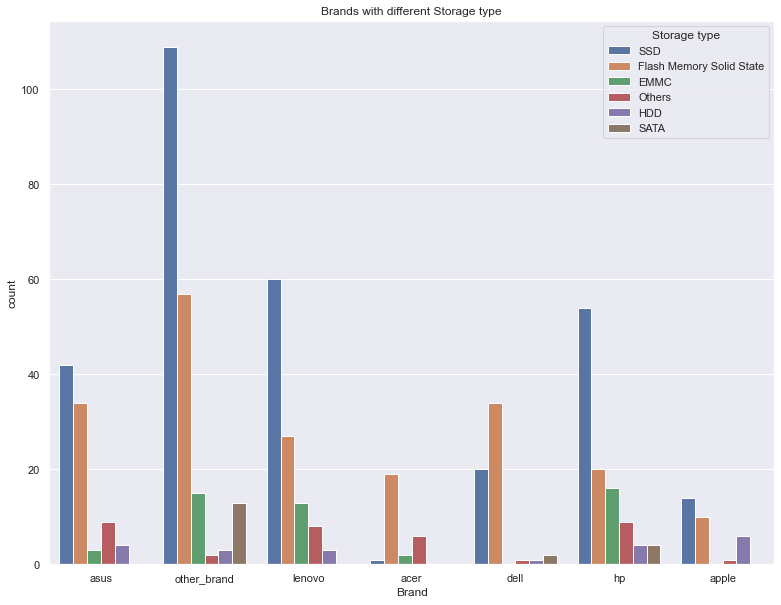

In [8]:
plt.figure(figsize=(13,10))
ax = sns.countplot(x = 'Brand', hue = 'Storage type' , data =df).set(title='Brands with different Storage type')

### Distribution of Ratings across brands

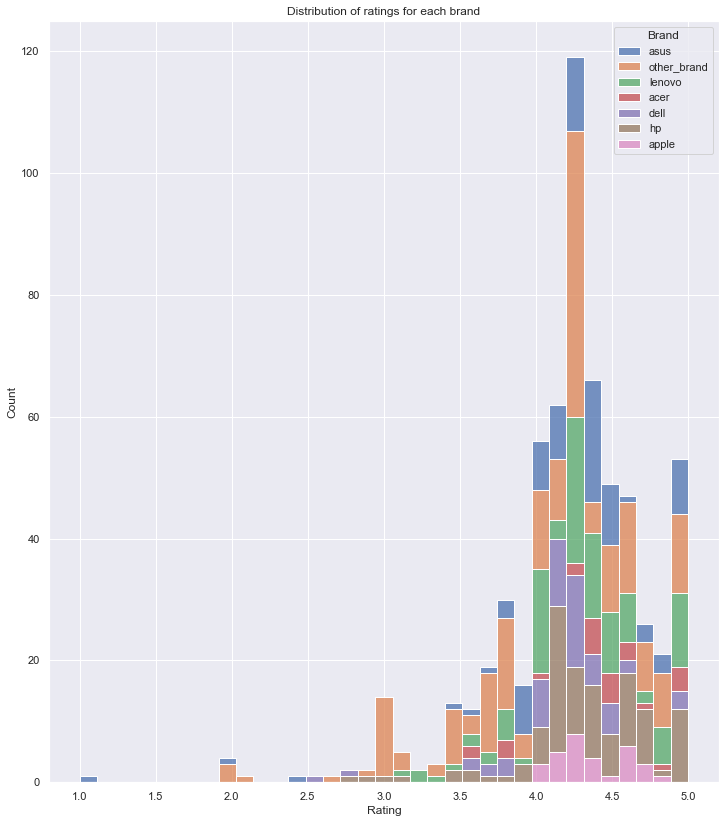

In [9]:
plt.figure(figsize=(12,14))
ax = sns.histplot(x = df.Rating, hue = 'Brand', multiple = "stack", data = df).set(title = 'Distribution of ratings for each brand')

### Average Ratings for each brands

In [10]:
df.pivot_table(index = ['Brand'], values = ['Rating'])

,Rating
Brand,
acer,4.407143
apple,4.354839
asus,4.235870
dell,4.150000
hp,4.304673
lenovo,4.310811
other_brand,4.073367


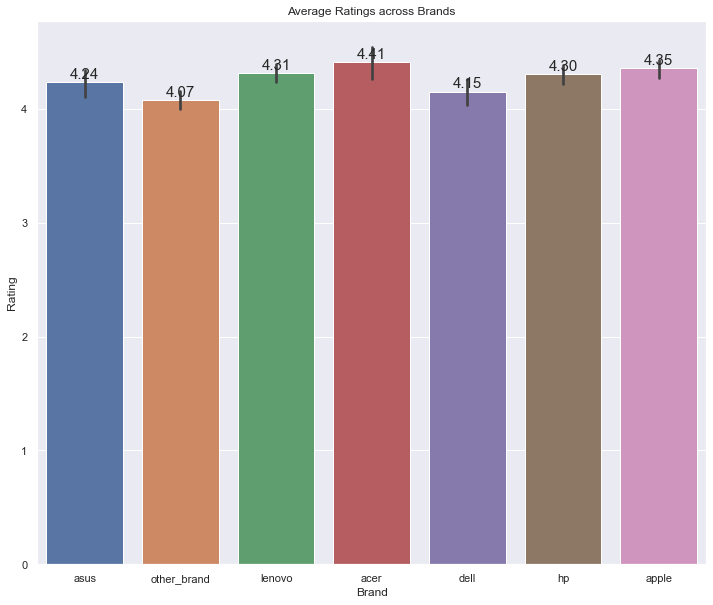

In [11]:
plt.figure(figsize=(12,10))
plots = sns.barplot(x= 'Brand' , y = 'Rating' , data = df)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Average Ratings across Brands')
plt.show(plots)

### Average price for each Brand

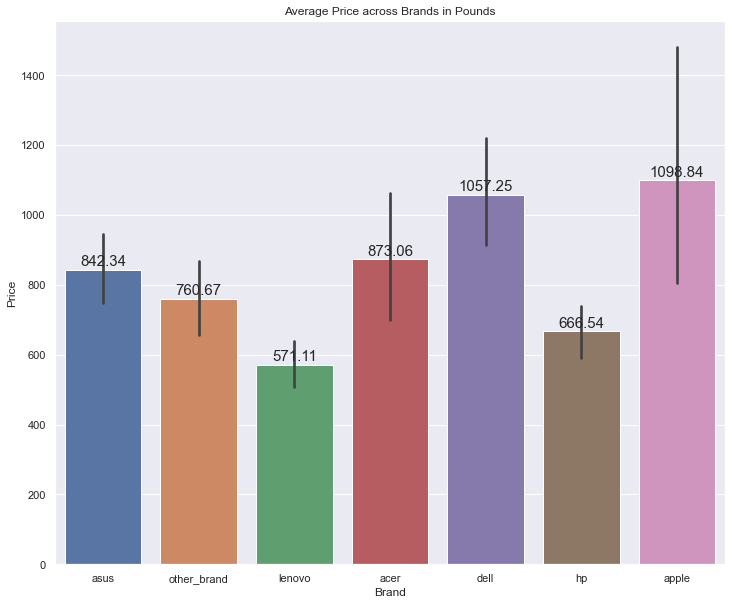

In [12]:
plt.figure(figsize=(12,10))
plots = sns.barplot(x= 'Brand' , y = 'Price' , data = df)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Average Price across Brands in Pounds')
plt.show(plots)

### Distribution of Processor type across Brand

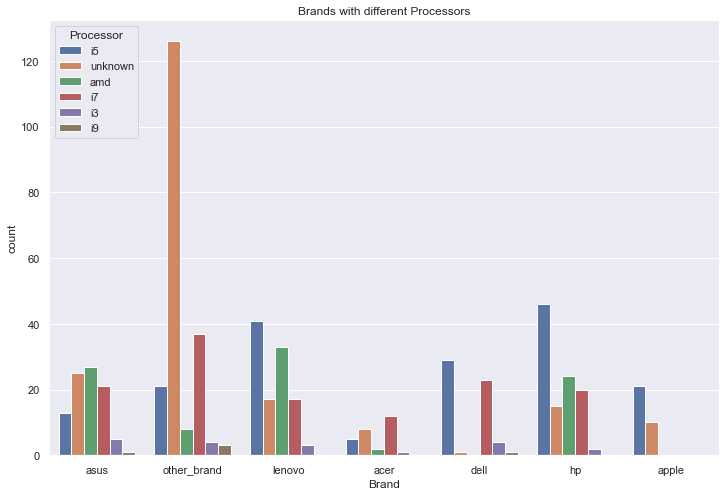

In [13]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x = 'Brand', hue = 'Processor' , data =df).set(title='Brands with different Processors')

<AxesSubplot:>

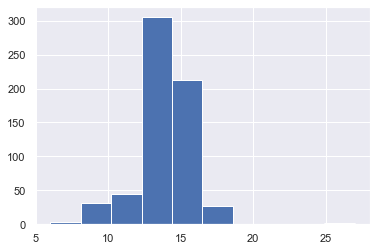

In [14]:
df["Display size"].hist()

### Number of Reviews for each brand

         Brand  No. Reviews
0         acer         8502
1        apple         6884
2         asus        30212
3         dell         2908
4           hp        24255
5       lenovo         9189
6  other_brand        42581


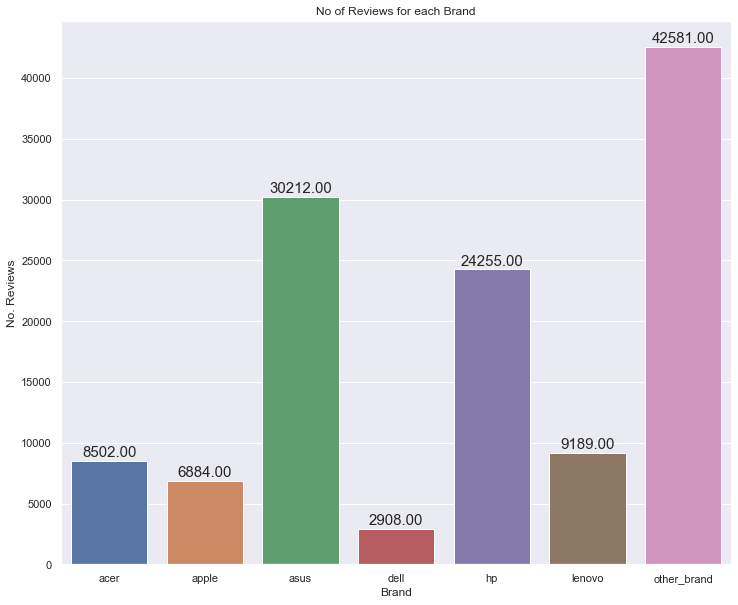

In [15]:
reviews_df = df.pivot_table(index = ['Brand'],values = ['No. Reviews'], aggfunc=np.sum)
reviews_df = reviews_df.reset_index()
print(reviews_df)

plt.figure(figsize=(12,10))
plots = sns.barplot(x= 'Brand' , y = 'No. Reviews' , data = reviews_df)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title('No of Reviews for each Brand')
plt.show(plots)

### Pivot Tables

In [16]:
new_df = df.pivot_table(index = ['Brand','Processor'],values = ['Display size','Price','Rating'], aggfunc=np.mean)
print(new_df)

                       Display size        Price    Rating
Brand       Processor                                     
acer        amd           14.800000  1149.990000  4.700000
            i3            13.500000   549.990000  4.300000
            i5            14.860000   743.314000  4.220000
            i7            15.025000  1248.040833  4.416667
            unknown       14.112500   362.848750  4.450000
apple       i5            13.219048   574.609524  4.276190
            unknown       15.660000  2199.737000  4.520000
asus        amd           14.837037  1025.795926  4.333333
            i3            15.280000   513.858000  3.940000
            i5            14.407692   701.904615  4.115385
            i7            14.390476  1218.794286  4.161905
            i9            15.600000  2799.980000  4.900000
            unknown       14.480000   388.398800  4.288000
dell        i3            14.800000   599.000000  4.575000
            i5            14.362069   740.540000  4.1586

### Average price for different types of processor for each brands

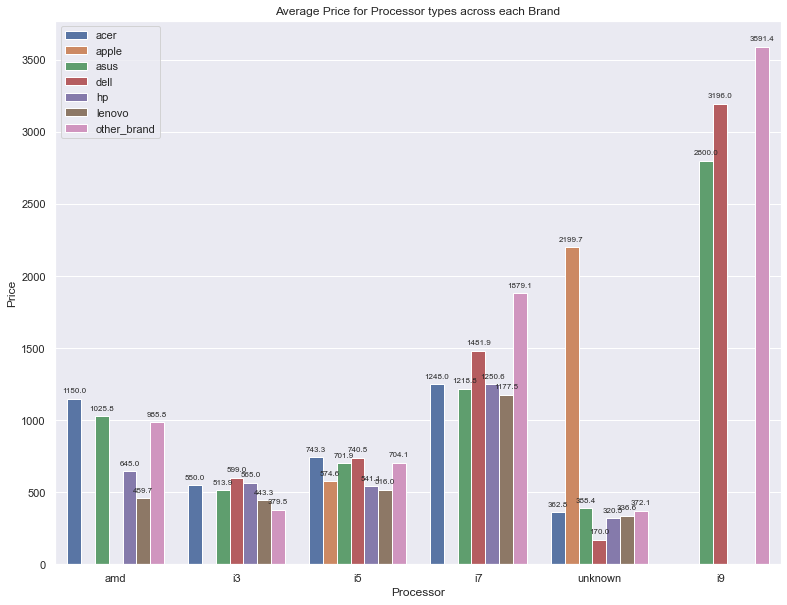

In [17]:
new_df = new_df.reset_index()

plt.figure(figsize=(13,10))
plots = sns.barplot(data= new_df, x= "Processor", y="Price", hue="Brand")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plots.legend(loc=2)
plt.title('Average Price for Processor types across each Brand')
plt.show(plots)

### Average Ratings for each Processor type for each brand

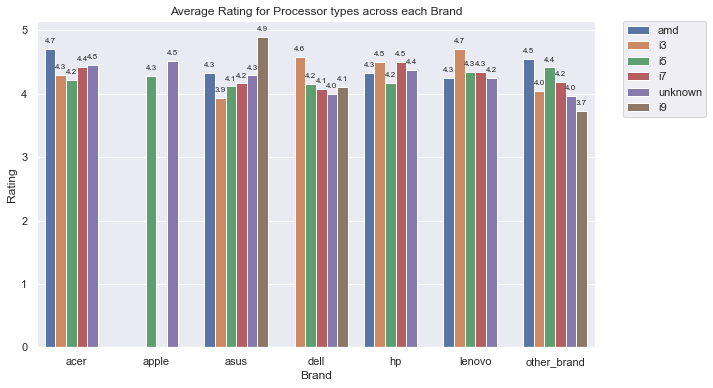

In [18]:
plt.figure(figsize=(10,6))
plots = sns.barplot(data= new_df, x= "Brand", y="Rating", hue="Processor")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plots.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Average Rating for Processor types across each Brand')
plt.show(plots)